# DLA with Multi processing 

### Imports and global variables

In [1]:
import matplotlib.pyplot as plt
from css_dla import Model
import multiprocess as mp
import pickle as pkl

In [2]:
N_MODELS = 30

### Initializing the model

In [3]:
models = []
for i in range(N_MODELS):
    models.append(Model(mode='single', w=600, h=600,seed=i*1000))

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000


In [4]:
m = Model(mode='single', w=1600, h=1600)
m.loop(20000)

1


([], [])

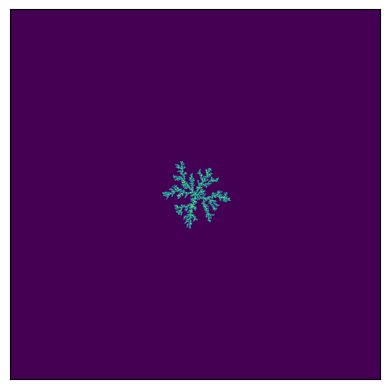

In [5]:
plt.imshow(m.grid)
plt.xticks([])
plt.yticks([])

### Running the model

In [7]:
def run_model(mdl):
    mdl.loop(2000)
    print(mdl.seed)
    return mdl

pool = mp.Pool(processes=6)
models = pool.map(run_model, models)


In [ ]:
# pkl.dump(models, open('models30_rw.pkl', 'wb'))

### Plotting the results

In [ ]:
# models = pkl.load(open('models30.pkl', 'rb'))

IndexError: index 2 is out of bounds for axis 0 with size 2

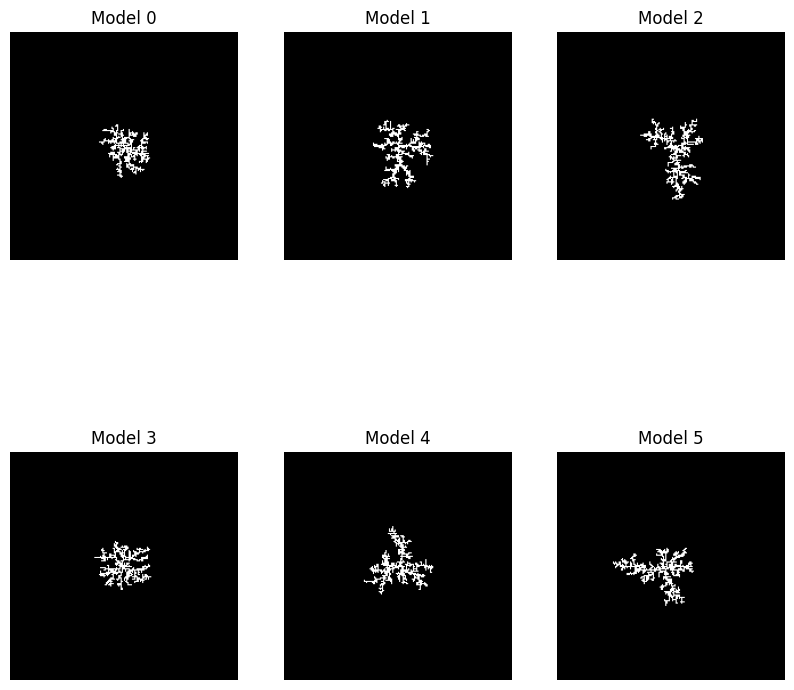

In [8]:
import numpy as np
fig, axes = plt.subplots(2, 3, figsize=(10, 10))
for i, mdl in enumerate(models):
    # if i >= 6:
    #     break
    ax = axes[i//3, i%3]
    ax.imshow(mdl.grid[200:400,200:400], cmap='gray')
    ax.set_title(f'Model {i}')
    ax.axis('off')
plt.tight_layout()
print(np.sum(models[0].grid))

### Plot the density gradient

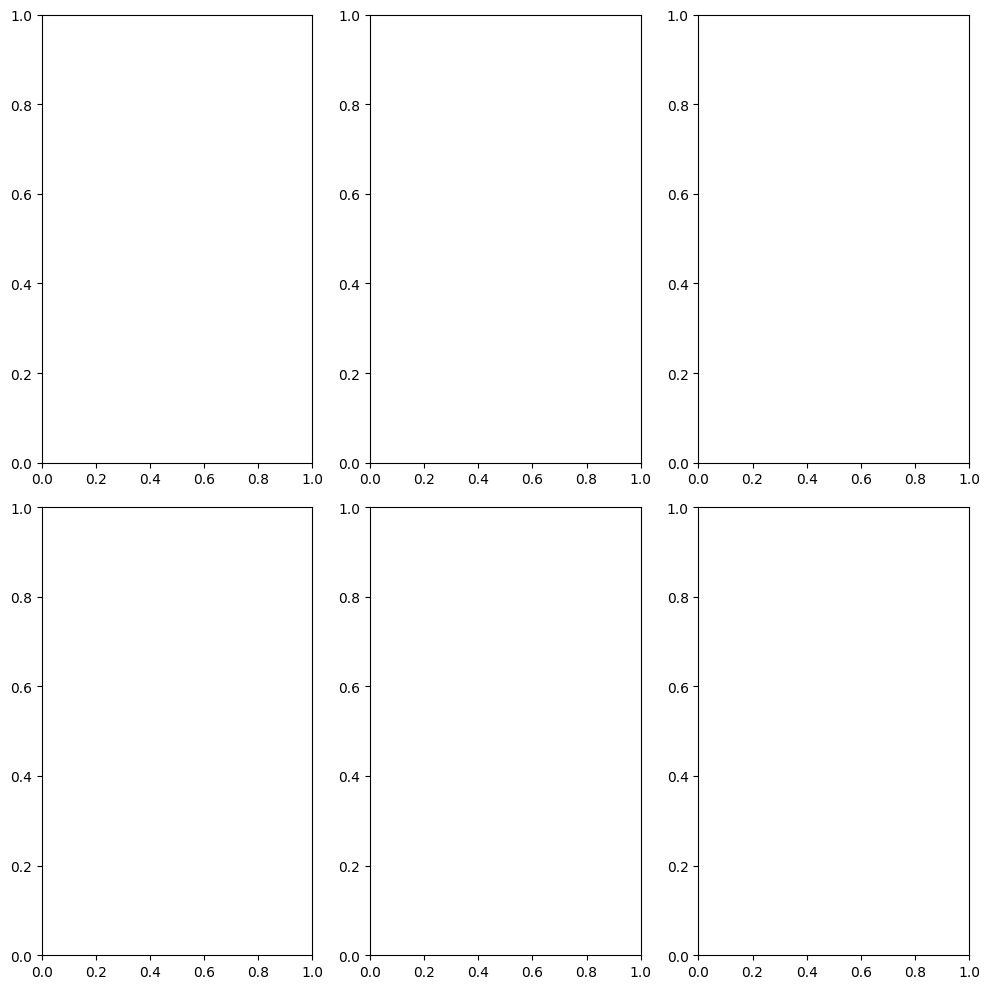

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(10, 10))
dists = []
dens = []
for i, mdl in enumerate(models):
    # ax = axes[i//3, i%3]
    distances, densities = mdl.density_gradient()
    dists.append(distances)
    dens.append(densities)
    # ax.plot(distances, densities, '-0', color='blue')
    # ax.axis('off')
plt.tight_layout()

6


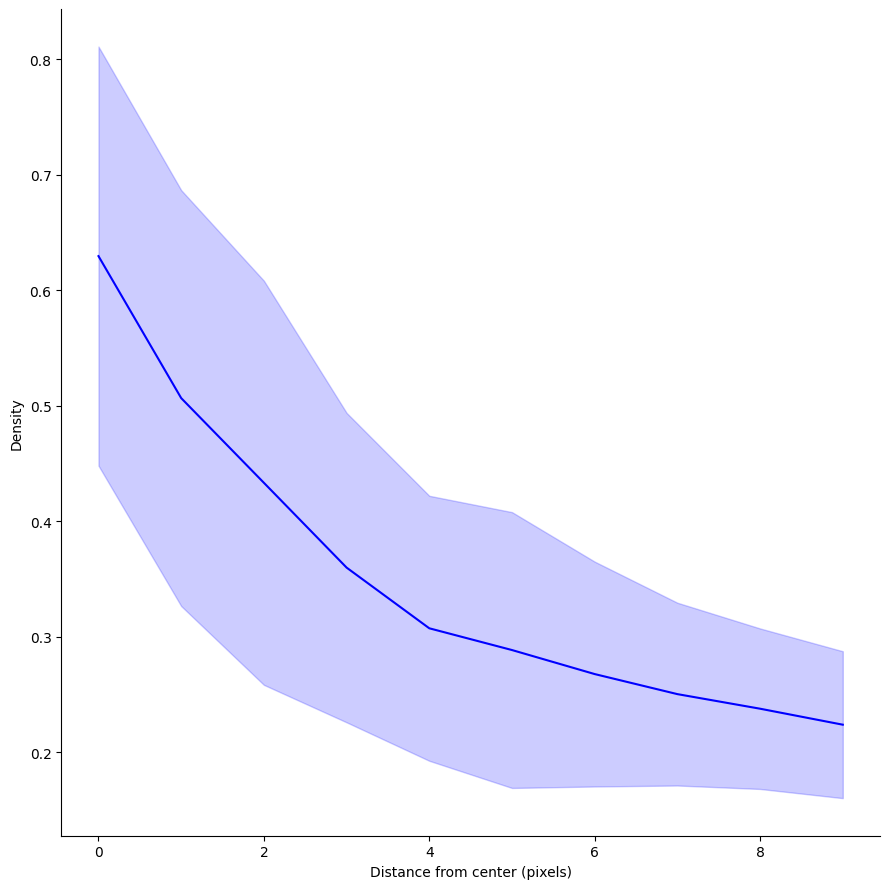

In [13]:
# Merge the density gradients
from numpy import average

merged_dists = list(range(min([len(d) for d in dists]) - 10))
merged_densities = []
print(len(dists))
for i in range(len(merged_dists)):
    merged_densities.append([dens[j][i] / 2 for j in range(len(dens))])

def std(lst):
    return (sum([(x-average(lst))**2 for x in lst])/(len(lst)-1))**0.5

average_densities = [average(d) for d in merged_densities]
confidence_intervals = [2*std(d) for d in merged_densities]


fig, ax = plt.subplots(1, 1, figsize=(9, 9))
ax.plot(merged_dists, average_densities, '-', color='blue')
ax.fill_between(merged_dists, [average_densities[i]-confidence_intervals[i] for i in range(len(merged_dists))], [average_densities[i]+confidence_intervals[i] for i in range(len(merged_dists))], color='blue', alpha=0.2)
# Makes log log
# ax.set_xscale('log')
# ax.set_yscale('log')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('Distance from center (pixels)')
plt.ylabel('Density')
# plt.ylim(0, 1)
# plt.xlim(0, 140)
plt.tight_layout()


plt.savefig('density_gradient.png', dpi=300)

In [14]:
import powerlaw
fit = powerlaw.Fit(average_densities[:100], discrete=True)
print(fit.distribution_compare('power_law', 'exponential'))
print(fit.distribution_compare('power_law', 'truncated_power_law'))
# print(fit.distribution_compare('power_law', 'lognormal'))

Calculating best minimal value for power law fit
(-0.6005583576830507, 0.01681657079608376)


/Users/pimmeulensteen/Library/Python/3.9/lib/python/site-packages/powerlaw.py:1156: RuntimeWarning: invalid value encountered in log
  self.alpha = 1 + (self.n / sum(log(data / (self.xmin - .5))))
Assuming nested distributions


(-0.3720902647514085, 0.38832498761686896)


### Fractal Dimensions

In [15]:
fractal_dims = []
for mdl in models:
    fractal_dims.append(mdl.get_fractal_dim())


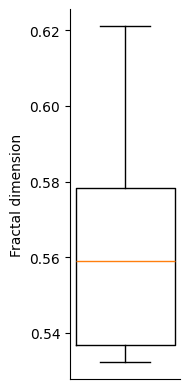

In [17]:
plt.figure(figsize=(2, 4))
plt.boxplot(fractal_dims,widths=[0.9])
plt.ylabel('Fractal dimension')
# plt.ylim(1.3,1.35)
# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)



plt.xticks([])
plt.tight_layout()

plt.savefig('fractal_dims_1set.png', dpi=300)

